In [36]:
import sklearn.cluster
import numpy as np
from astroquery.gaia import Gaia
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

t = Table.read('gaia_field.hdf', format='hdf5')


In [37]:
X = np.array([t['ra'], t['dec'], t['parallax'], t['pmra'], t['pmdec'] ])
Xnew = np.transpose(X)
#Xcut = Xnew[:10000]

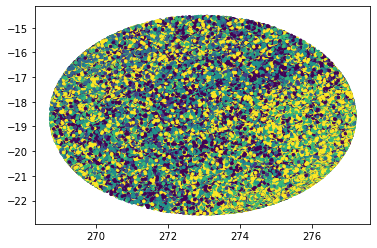

In [38]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=7).fit(Xnew)
labels = gmm.predict(Xnew)
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=labels, s=7, cmap='viridis')


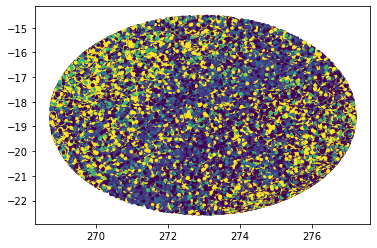

In [39]:
labels_1 = gmm.fit_predict(Xnew)
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=labels_1, s=7, cmap='viridis')


In [40]:
labels_2 = gmm.get_params(deep=True)
print (labels_2)

{'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 7, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}


In [41]:
labels_3 = gmm.predict_proba(Xcut)
print (labels_3)

[[9.09864377e-07 3.09892348e-15 1.41719041e-02 ... 7.15522264e-02
  1.09599278e-04 9.14165321e-01]
 [5.79579321e-17 1.88814386e-38 8.30886892e-04 ... 2.86289755e-01
  2.70041994e-04 7.12609234e-01]
 [1.17025793e-01 8.01789902e-01 1.66860319e-02 ... 1.42121966e-02
  1.05811410e-04 5.01802058e-02]
 ...
 [8.60042293e-06 2.46406418e-13 4.92357388e-02 ... 1.79956614e-01
  2.72397423e-04 7.70526537e-01]
 [1.85956109e-01 5.51190587e-05 1.58616299e-02 ... 5.52425366e-02
  3.63269967e-05 7.42848263e-01]
 [1.39210240e-11 8.66626358e-26 2.65409085e-02 ... 4.39278578e-01
  7.67970018e-04 5.33412284e-01]]
